In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
from collections import Counter
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1, n_redundant=0,weights=[0.99],random_state=10)

In [10]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

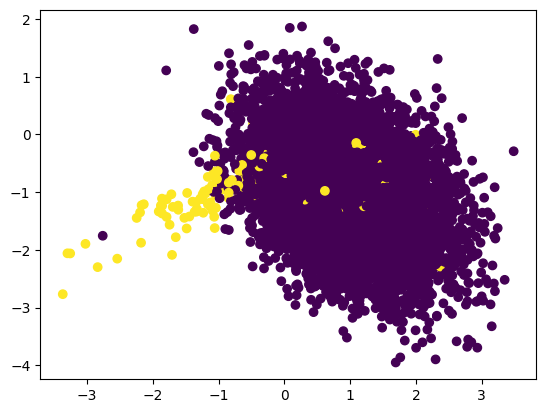

In [16]:
plt.scatter(pd.DataFrame(X)[0], pd.DataFrame(X)[1],c=y)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['lbfgs', 'liblinear', 'newton-cg',  'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [19]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [20]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [21]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model, param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(X_train,y_train)

c:\Users\phani\OneDrive\Desktop\Geetha\Learnings\GENAI\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\phani\OneDrive\Desktop\Geetha\Learnings\GENAI\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\phani\OneDrive\Desktop\Geetha\Learnings\GENAI\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [22]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'lbfgs'}

In [23]:
y_pred=grid.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_pred)
print(f"score: {score}")
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

score: 0.992
[[2468    2]
 [  18   12]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2470
           1       0.86      0.40      0.55        30

    accuracy                           0.99      2500
   macro avg       0.92      0.70      0.77      2500
weighted avg       0.99      0.99      0.99      2500

